## Install

In [ ]:
!pip install langchain
!pip install langchain-chroma
!pip install -U langchain-community
!pip install tiktoken
!pip install unstructured

  Using cached langchain_community-0.3.23-py3-none-any.whl.metadata (2.5 kB)
  Using cached dataclasses_json-0.6.7-py3-none-any.whl.metadata (25 kB)
  Using cached pydantic_settings-2.9.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached httpx_sse-0.4.0-py3-none-any.whl.metadata (9.0 kB)
  Using cached marshmallow-3.26.1-py3-none-any.whl.metadata (7.3 kB)
  Using cached typing_inspect-0.9.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached mypy_extensions-1.1.0-py3-none-any.whl.metadata (1.1 kB)
Using cached langchain_community-0.3.23-py3-none-any.whl (2.5 MB)
Using cached dataclasses_json-0.6.7-py3-none-any.whl (28 kB)
Using cached httpx_sse-0.4.0-py3-none-any.whl (7.8 kB)
Using cached pydantic_settings-2.9.1-py3-none-any.whl (44 kB)
Using cached marshmallow-3.26.1-py3-none-any.whl (50 kB)
Using cached typing_inspect-0.9.0-py3-none-any.whl (8.8 kB)
Using cached mypy_extensions-1.1.0-py3-none-any.whl (5.0 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 13.2 MB/s eta 0:00:00


In [ ]:
!pip install "tensorflow>=2.15.0"
!pip install --upgrade tensorflow-hub


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.5/24.5 MB 82.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 102.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 105.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 116.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 24.4 MB/s eta 0:00:00


In [1]:
# Import the libraries

import os
import sys
from IPython.display import HTML, display

import numpy as np
import pandas as pd
import tensorflow as tf
from math import ceil
from scipy.spatial.distance import cosine

import matplotlib.pyplot as plt
import seaborn as sns

import collections
import random
import time
import string
import re

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Embedding, Dense, Convolution1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dropout, LSTM, Bidirectional

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
%cd /content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app

/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app


In [4]:
!ls

df.csv			   MutualFundSummary10
df_main.csv		   MutualFundSummary2
df_RAG2_5.csv		   MutualFundSummary2_5
df_RAG2.csv		   MutualFundSummary3
df_RAG3_5.csv		   MutualFundSummary3_5
df_RAG3.csv		   MutualFundSummary4
df_RAG4.csv		   MutualFundSummary4_5
df_RAG_all.csv		   MutualFundSummary5
df_RAG.csv		   MutualFundSummary6
df_summary.csv		   MutualFundSummary7
docs			   MutualFundSummary8
FundArticlesHealthy.csv    MutualFundSummary9
FundArticlesUnhealthy.csv  NLP_Deep_Learning_Questrom_WS_03_2020.ipynb
glove.6B.50d.txt	   word2vec_model.pkl
MutualFundLabels.csv	   word2vec_MutualFundSummary.txt
MutualFundSummary	   word2vec_perso.txt
MutualFundSummary1


In [5]:
DIRECTORY = '/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app'

SUMMARY_PATH = '/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/MutualFundSummary'
SUMMARY_LABELS_PATH = '/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/MutualFundLabels.csv'

HEALTHY_ARTICLES_PATH = os.path.join(DIRECTORY, "Data", "FundArticlesHealthy.csv")
UNHEALTHY_ARTICLES_PATH = os.path.join(DIRECTORY, "Data", "FundArticlesUnhealthy.csv")

glove_word2vec = 'glove.6B.50d.txt'
our_word2vec = 'word2vec_perso.txt'
new_word2vec = 'word2vec_MutualFundSummary.txt'

In [6]:
# Progress bar
def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

# Save a word2vec dictionary.
def save_word2vec(filename):
    #with open(os.path.join('/Users/haoxing/Documents/Work/Teaching/Machine learning for Finance/Codes/NLP/NLP_app', filename),'a' , encoding='utf-8') as f :
    with open(os.path.join('/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/', filename),'a' , encoding='utf-8') as f :
        for k, v in word2vec.items():
            line = k+' '+str(list(v)).strip('[]').replace(',','')+'\n'
            f.write(line)

# Load a word2vec dictionary.
def load_word2vec(filename):
    word2vec = {}
    #with open(os.path.join('/Users/haoxing/Documents/Work/Teaching/Machine learning for Finance/Codes/NLP/NLP_app', filename), encoding='utf8') as f:
    with open(os.path.join('/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/', filename), encoding='utf8') as f:
        for line in f:
            try :
                values = line.split()
                word = values[0]
                vec = np.asarray(values[1:], dtype='float32')
                word2vec[word] = vec
            except :
                None
    return word2vec

# read the repo in PATH and append the texts in a list
def get_data(PATH):
    list_dir = os.listdir(PATH)
    texts = []
    fund_names = []
    out = display(progress(0, len(list_dir)-1), display_id=True)
    for ii, filename in enumerate(list_dir) :
        with open(PATH+'/'+filename, 'r', encoding="utf8") as f :
            txt = f.read()
            try :
                txt_split = txt.split('<head_breaker>')
                summary = txt_split[1].strip()
                fund_name = txt_split[0].strip()
            except :
                summary = txt
                fund_name = ''
        texts.append(summary)
        fund_names.append(fund_name)
        out.update(progress(ii, len(list_dir)-1))
    return fund_names, texts

In [7]:
# Get the summaries
fund_names, summaries = get_data(SUMMARY_PATH)

In [8]:
len(fund_names)

545

In [9]:
len(summaries)

545

In [10]:
fund_names[20]

'AB Municipal Bond Inflation Strategy'

In [11]:
type(summaries), type(fund_names)

(list, list)

In [12]:
df_summary = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/df_summary.csv')
df_summary

,id,fund_name,Performance fee?,Ivestment Strategy,Leverage?,Portfolio composition,Concentration,Ivestment_Strategy_label,Predicted investment strategy,investment strategy evidence,source meta data,Prediction
0,0000051931-18-000151,American Funds College 2018 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2018 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
1,0000051931-18-000151,American Funds College 2021 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2021 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
2,0000051931-18-000151,American Funds College 2024 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2024 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
3,0000051931-18-000151,American Funds College 2027 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2027 Fund <head_breaker...,{'source': 'MutualFundSummary1/American Funds ...,2.0
4,0000051931-18-000151,American Funds College 2030 Fund,NaN,Balanced Fund (Low Risk),Yes,Investment grade securities,Diversified,2.0,Balanced Fund (Low Risk),American Funds College 2030 Fund <head_breaker...,{'source': 'MutualFundSummary/American Funds C...,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
427,0001710607-18-000172,American Century Diversified Corporate Bond ETF,NaN,Fixed Income Long Only (Low Risk),Yes,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Corporate Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
428,0001710607-18-000172,American Century Diversified Municipal Bond ETF,NaN,Fixed Income Long Only (Low Risk),No,Investment grade securities,Diversified,1.0,Fixed Income Long Only (Low Risk),American Century Diversified Municipal Bond ET...,{'source': 'MutualFundSummary/American Century...,1.0
429,0001710607-18-000172,American Century Quality Diversified Internati...,NaN,Equity Long Only (Low Risk),Yes,Sub-investment grade securities or emerging ma...,Diversified,0.0,Equity Long Only (Low Risk),American Century Quality Diversified Internati...,{'source': 'MutualFundSummary/American Century...,0.0
430,0001710607-18-000172,American Century STOXX U.S. Quality Growth ETF,NaN,Equity Long Only (Low Risk),Yes,Listed Equities,Diversified,0.0,Equity Long Only (Low Risk),American Century STOXX U.S. Quality Growth ETF...,{'source': 'MutualFundSummary/American Century...,0.0


In [13]:
common_fund_names = []
for index, name in enumerate(fund_names):
    # Check if the current fund name is in the set of common names
    if name in set(df_summary['fund_name']):
        # If it is, append the corresponding summary (using the same index)
        common_fund_names.append(fund_names[index])
len(common_fund_names)

432

In [14]:
common_summaries = []
for index, name in enumerate(fund_names):
    # Check if the current fund name is in the set of common names
    if name in set(df_summary['fund_name']):
        # If it is, append the corresponding summary (using the same index)
        common_summaries.append(summaries[index])
len(common_summaries)

432

In [15]:
#checking
common_fund_names[1]

'ALL CAP GROWTH FUND'

In [16]:
common_summaries[1]

'Fund Summary\nInvestment Objective\nThe fund seeks long-term capital growth.\nFees and Expenses\nThe following table describes the fees and expenses you may pay if you buy and hold shares of the fund. You may qualify for sales charge discounts if you and your family invest, or agree to invest in the future, at least $50,000 in American Century Investments funds. More information about these and other discounts is available from your financial professional and in Calculation of Sales Charges on page 12 of the fund’s prospectus, Appendix A of the fund’s prospectus and Sales Charges in Appendix B of the statement of additional information.\nShareholder Fees (fees paid directly from your investment)\n \n \nInvestor\nI1\nA\nC\nR\nMaximum Sales Charge (Load) Imposed on\nPurchases (as a percentage of offering price)\nNone\nNone\n5.75%\nNone\nNone\nMaximum Deferred Sales Charge (Load)\n(as a percentage of the lower of the original\noffering price or redemption proceeds when redeemed\nwithin o

## split to train, validation, test

In [17]:
X_train, X_val_test, y_train, y_val_test = train_test_split(
    common_summaries, common_fund_names, test_size=0.4, random_state=815)

In [18]:
#split to test and validation set
X_val, X_test, y_val, y_test = train_test_split(
    X_val_test, y_val_test, test_size=0.5, random_state=815)

In [19]:
len(X_train), len(X_val), len(X_test)

(259, 86, 87)

In [20]:
y_train

['MFS Maryland Municipal Bond Fund',
 'Janus Henderson Enterprise Portfolio',
 'Ivy Municipal Bond Fund',
 'Fidelity Advisor New Insights Fund',
 'CAPITAL VALUE FUND',
 'Franklin FTSE Mexico ETF',
 'Dreyfus Global Equity Income Fund',
 'Fidelity Emerging Markets Discovery Fund',
 'Short-Term Bond Fund',
 'Capital Income Builder',
 'Janus Henderson Balanced Fund',
 'Federated MDT Large Cap Growth Fund',
 'Ultra-Short Bond Fund',
 'Ivy High Income Fund',
 'Treasury Money Market Trust',
 'Fidelity Advisor Energy Fund',
 'MainStay VP International Equity Portfolio',
 'Columbia Variable Portfolio - Emerging Markets Fund',
 'American Funds College 2018 Fund',
 'PIMCO California Intermediate Municipal Bond Fund',
 'Columbia Variable Portfolio - Select Large-Cap Value Fund',
 'MainStay VP Balanced Portfolio',
 'Columbia Flexible Capital Income Fund',
 'Janus Henderson Global Unconstrained Bond Portfolio',
 'PIMCO REALPATH 2055',
 'NORTHERN U.S. GOVERNMENT SELECT MONEY MARKET FUND',
 'Eaton Van

## Following the NLP application in class, use the skip-gram model to build a word embedding dictionary from the mutual fund prospectus in the training set

### Tokenize the text

In [21]:
def lemma_tokenizer(text):
    lemmatizer=WordNetLemmatizer()
    return [lemmatizer.lemmatize(token) for token in word_tokenize(text.replace("'"," "))]

In [22]:
stop_words = set(stopwords.words('english')+list(string.punctuation)+['``',"''"]+["]","[","*"]+['doe', 'ha', 'wa'])

In [23]:
# clean and tokenize the text
def tokenizer(txt):
    txt = txt.replace('\n', ' ').replace('\t', ' ').lower()
    word_tokens = word_tokenize(txt)
    filtered_sentence = [w for w in word_tokens if not w in stop_words]
    filtered_sentence = [w for w in filtered_sentence if re.sub("[^A-Za-z ]+",'',w) != '']
    return filtered_sentence

In [ ]:
#extract X_train as a list
#X_train_list = X_train.tolist()

In [ ]:
#import nltk
#nltk.download('punkt')

In [ ]:
#nltk.download('punkt_tab')

In [24]:
text_words = np.concatenate([tokenizer(summary) for summary in X_train])

In [25]:
text_words, text_words.size

(array(['mfs', 'maryland', 'municipal', ..., "'s", 'website',
        'information'], dtype='<U44'),
 464939)

### Process Skip-Gram model Input

In [26]:
# Training Parameters
batch_size = 128 # The model will be trained batch per batch and one batch contains 128 rows
num_epochs = 2 # The model will go through all the data twice

In [27]:
# Word2Vec Parameters
embedding_size = 50 # Dimension of the embedding vector
max_vocabulary_size = 5000 # Total number of different words in the vocabulary
min_occurrence = 10 # Remove all words that does not appears at least n times
skip_window = 3 # How many words to consider left and right
num_skips = 4 # How many times to reuse an input to generate a label

In [28]:
# Build the dictionary and replace rare words with UNK token
count = [('UNK', -1)]
# Retrieve the most common words
count.extend(collections.Counter(text_words).most_common(max_vocabulary_size - 1))
# Remove samples with less than 'min_occurrence' occurrences
for i in range(len(count) - 1, -1, -1):
    if count[i][1] < min_occurrence:
        count.pop(i)
    else:
        # The collection is ordered, so stop when 'min_occurrence' is reached
        break

In [29]:
word2id = dict() #same as {}
for i, (word, _)in enumerate(count):
    word2id[word] = i
#word2id

In [30]:
id2word = dict(zip(word2id.values(), word2id.keys()))
vocab_size = len(id2word)

In [ ]:
#id2word

In [31]:
print ('size of the vocabulary : '+str(vocab_size))

size of the vocabulary : 2699


In [32]:
len(word2id) #the words in'id2word and word2id is same

2699

In [33]:
# create data
data = list() #[]
unk_count = 0
for word in text_words:
    # Retrieve a word id, or assign it index 0 ('UNK') if not in dictionary
    index = word2id.get(word, 0) #if vwe cannot find the word, it will return 0 instead of having an error
    if index == 0:  #which means we could not find the word in our dictionary
        unk_count += 1
    data.append(index)
count[0] = ('UNK', unk_count) #update the number of 'UNK'

In [34]:
count[0]

('UNK', 9345)

In [35]:
print(data[:20]) #377 is janus

[400, 0, 117, 138, 1, 292, 1347, 30, 4, 128, 1, 4, 128, 362, 39, 28, 1240, 25, 554, 78]


In [36]:
# build OneHot vector from index
def to_one_hot(data_point_index, vocab_size):
    temp = np.zeros(vocab_size)
    temp[data_point_index] = 1
    return temp

In [37]:
# Generate training batch for the skip-gram model
def batch_generator(batch_size, num_skips, skip_window, vocab_size):
    data_index = 0
    while True :
        assert batch_size % num_skips == 0
        assert num_skips <= 2 * skip_window
        # batch is filled with 128 inputs
        batch = np.ndarray(shape=(batch_size), dtype=np.int32)
        # labels is filled with 128 outputs
        labels = np.ndarray(shape=(batch_size), dtype=np.int32)
        span = 2 * skip_window + 1
        # buffer keep track of the visited indexes visited
        buffer = collections.deque(maxlen=span)
        if data_index + span > len(data):
            data_index = 0
            # We stop the loop when we went through all the corpus
            break
        buffer.extend(data[data_index:data_index + span])
        data_index += span
        for i in range(batch_size // num_skips):
            # Take the context current word
            context_words = [w for w in range(span) if w != skip_window]
            # Randomly select num_skips words in the context
            words_to_use = random.sample(context_words, num_skips)
            for j, context_word in enumerate(words_to_use):
                # Creates one raw data
                batch[i * num_skips + j] = buffer[skip_window]
                labels[i * num_skips + j] = buffer[context_word]
            if data_index == len(data):
                buffer.extend(data[0:span])
                data_index = span
            else:
                buffer.append(data[data_index])
                data_index += 1
        # Backtrack a little bit to avoid skipping words in the end of a batch
        data_index = (data_index + len(data) - span) % len(data)

        # translate word index to on-hot representation
        batch_one_hot = np.array([to_one_hot(b, vocab_size) for b in batch])
        labels_one_hot = np.array([to_one_hot(l, vocab_size) for l in labels])

        # output one batch
        yield batch_one_hot, labels_one_hot

### Train the skip-gram model

In [38]:
# Create en compile the Autoencoder
def creat_word2vec_model():
    input_word = Input(shape=(vocab_size,))

    encoded = Dense(embedding_size, activation='linear')(input_word)
    decoded = Dense(vocab_size, activation='softmax')(encoded)

    # The autoencoder is the whole model with hidden layer contected to the output layer.
    autoencoder = Model(input_word, decoded)
    # The encoder is just the input layer connected to the hidden layer. One the Autoencoder will be trained we will use
    # the encoder to create our word vectors
    encoder = Model(input_word, encoded)

    autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
    return encoder, autoencoder

In [39]:
# We create the model
encoder, autoencoder = creat_word2vec_model()

In [40]:
autoencoder.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2699)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 50)             │       135,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2699)           │       137,649 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 272,649 (1.04 MB)

 Trainable params: 272,649 (1.04 MB)

 Non-trainable params: 0 (0.00 B)

In [41]:
# Finally we can train the model by feeding it with our batch generator !
autoencoder.fit(batch_generator(batch_size, num_skips, skip_window, vocab_size), steps_per_epoch=ceil(len(data) / batch_size), epochs=num_epochs)

Epoch 1/2
3633/3633 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - loss: 0.0933
Epoch 2/2
3633/3633 ━━━━━━━━━━━━━━━━━━━━ 27s 7ms/step - loss: 0.0028


In [42]:
# Create the Vectorizer function (prediciton of the encoder)
def vecotrize(word):
    word_one_hot = to_one_hot(word2id[word], vocab_size)
    return encoder.predict(np.array([word_one_hot]))[0]

In [43]:
# Create the word2vec dictionary
word2vec = {w : vecotrize(w) for w in word2id.keys()}

# This dictionary gives for all words it's vectorial representation.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━

In [ ]:
# We can save the word2vec dictionary to reuse it later.
#new_word2vec.to_csv('word2vec_MutualFundSummary_train.txt')

In [44]:
type(word2vec)

dict

In [ ]:
#import pickle
#file_path_pickle = 'word2vec_model.pkl'
#print(f"Saving dictionary to {file_path_pickle} using pickle...")
#with open(file_path_pickle, 'wb') as f: # 'wb' means write binary
#    pickle.dump(word2vec, f)
#print("Saving complete.")

Saving dictionary to word2vec_model.pkl using pickle...
Saving complete.


In [ ]:
#word2vec = load_word2vec("word2vec_perso.txt")

In [45]:
# for a given word, output the n closer words in the word2vec maping.
def get_n_closer(w, n, word2vec):
    vect = word2vec[w]
    distances_dict = {k: cosine(v, vect) for k, v in word2vec.items()}

    closer_words = []
    for _ in range(n):
        min_key = min(distances_dict.keys(), key=lambda k: distances_dict[k])
        closer_words.append(min_key)
        del distances_dict[min_key]
    return closer_words

In [49]:
words_neighbors_1 = get_n_closer('risk', 10, word2vec)
print('words close to risk : ' +str(', '.join(words_neighbors_1)))
#words_neighbors_2 = get_n_closer('equiderivativety', 10, word2vec)
#print('words close to derivative : ' +str(', '.join(words_neighbors_2)))

words close to risk : risk, targets, slump, concerns, mortgage-, relative, treated, unavailable, participation, although


In [50]:
#plot closer words
# fit the TSNE dimenstion reduction model
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
vectors = np.array([v for k, v in word2vec.items()])
words = np.array([k for k, v in word2vec.items()])
print(vectors.shape)

tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
vectors = tsne_model.fit_transform(vectors)

print(vectors.shape)

(2699, 50)


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


(2699, 2)


In [51]:
reduced_word2vec = {words[i] : list(vectors[i]) for i in range (len(vectors))}

In [52]:
def create_neighbors_visualisation_data(words, num_neighbors, word2vec):
    words_neighbors = []
    for word in words :
        try :
            words_neighbors.append(get_n_closer(word, num_neighbors, word2vec))
        except :
            print(word +' not in word2vec')

    words_neighbors = np.concatenate(words_neighbors)
    vectors_neighbors = np.array([reduced_word2vec[word] for word in words_neighbors])

    return vectors_neighbors[:,0], vectors_neighbors[:,0], words_neighbors
x, y, labels = create_neighbors_visualisation_data(['fee', 'swaps'], 10, word2vec)

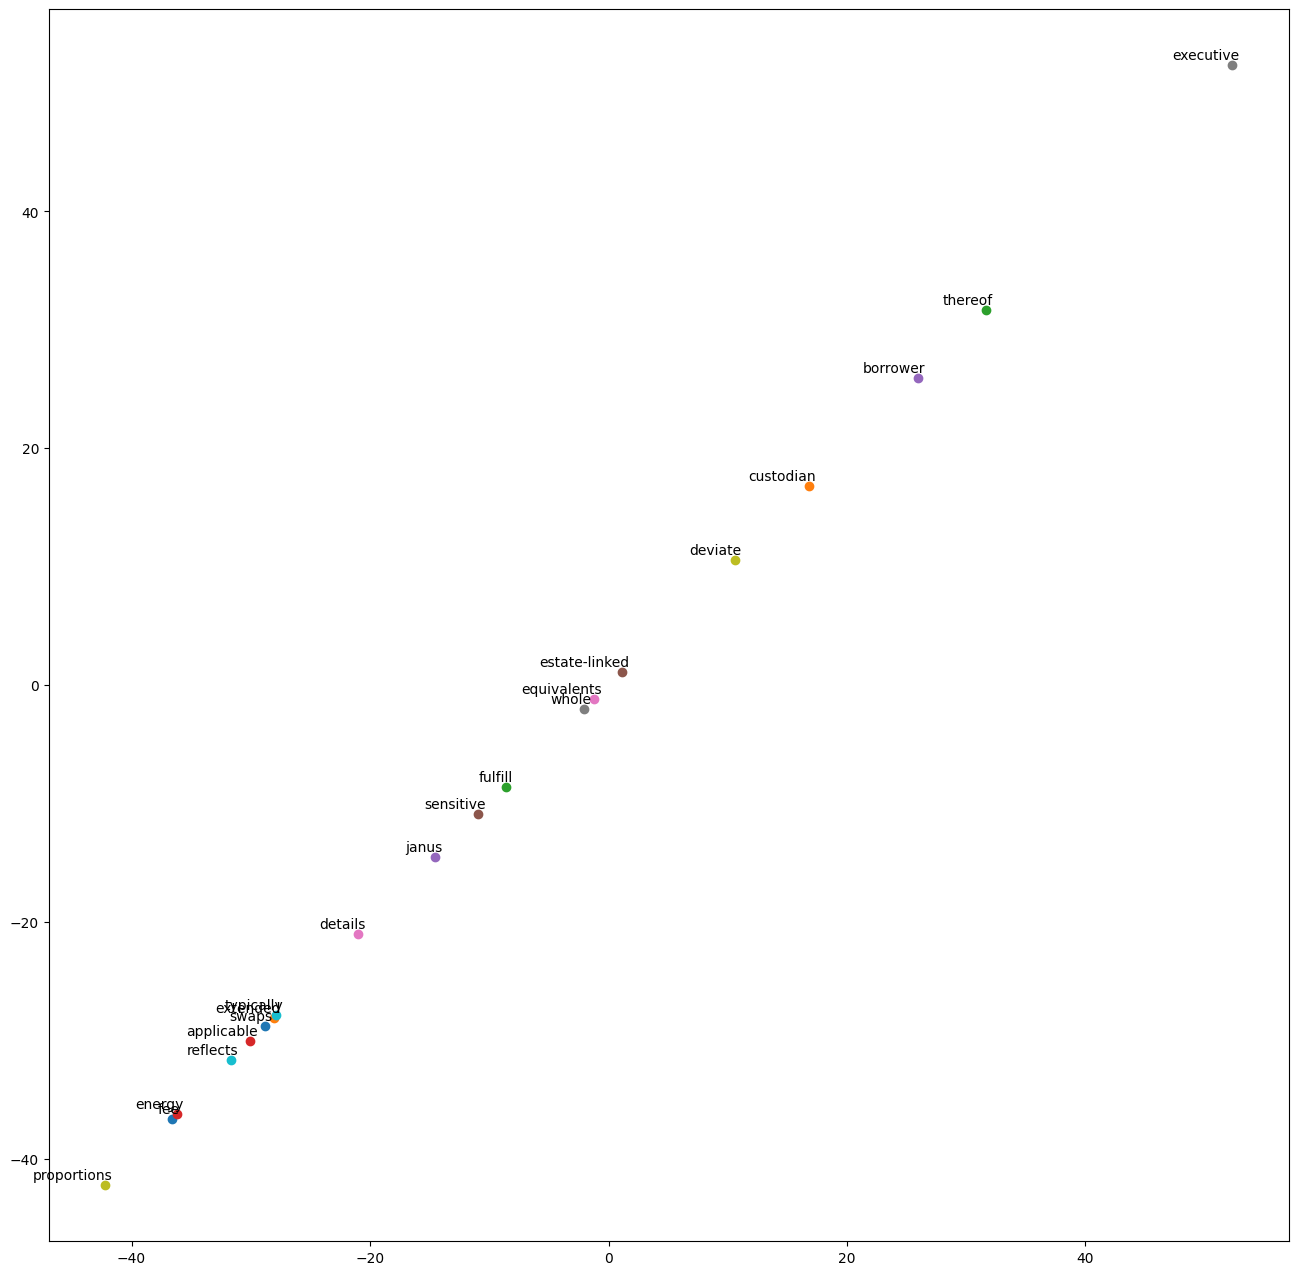

In [53]:
plt.figure(figsize=(16, 16))
for i in range(len(x)):
    plt.scatter(x[i],y[i])
    plt.annotate(labels[i],
        xy=(x[i], y[i]),
        xytext=(5, 2),
        textcoords='offset points',
        ha='right',
        va='bottom')
plt.show()

## Create a knowledge base

In [64]:
key_words = [ 'income', 'interest', 'bond', 'long','short',
             'equity', 'stock','low', 'risk', 'risks','strategy', 'strategies','return', 'volatility',
              'fund','funds','balance','balanced', 'yield','position']

In [55]:
#print(f"\nLoading dictionary from {file_path_pickle} using pickle...")
#with open('word2vec_model.pkl', 'rb') as f: # 'rb' means read binary
#    word2vec = pickle.load(f)
#print("Loading complete.")

In [56]:
#word2vec = load_word2vec(new_word2vec)

In [65]:
# Creates the knwoledge base by taking the num_neighbors closes neighbors of each key_words in word2vec
def create_knowledge_base(num_neighbors, word2vec, key_words):
    knowledge_base = set()
    out = display(progress(0, len(key_words)-1), display_id=True)
    for ii, key_word in enumerate(key_words) :
        knowledge_base.add(key_word)
        neighbors = []
        try :
            neighbors = get_n_closer(key_word, num_neighbors, word2vec)
        except :
            print(key_word + ' not in word2vec')

        knowledge_base.update(neighbors)

        out.update(progress(ii, len(key_words)-1))
    return knowledge_base

In [66]:
#word2vec = load_word2vec(our_word2vec)
knowledge_base = create_knowledge_base(5, word2vec, key_words)

In [67]:
print(knowledge_base)

{np.str_('operated'), np.str_('amt'), np.str_('targets'), np.str_('given'), 'position', 'yield', np.str_('fluctuate'), np.str_('mergers'), np.str_('participants'), np.str_('obsolescence'), np.str_('terrorism'), np.str_('tax-advantaged'), np.str_('available'), 'income', np.str_('advisers'), np.str_('shareholder'), np.str_('assurances'), 'risk', np.str_('necessarily'), 'balance', np.str_('number'), np.str_('hearing'), np.str_('values'), np.str_('less'), np.str_('unusually'), np.str_('jad'), np.str_('hypothetical'), np.str_('screens'), np.str_('neutral'), np.str_('statement'), np.str_('equity-income'), np.str_('region'), np.str_('modify'), np.str_('separate'), np.str_('conflicts'), np.str_('frequency'), np.str_('investments'), np.str_('experience'), 'stock', 'interest', np.str_('infrequent'), np.str_('consumer'), np.str_('successful'), 'risks', np.str_('absent'), np.str_('partners'), np.str_('contractually'), np.str_('merger'), 'volatility', np.str_('outstanding'), 'funds', 'short', np.st

In [63]:
items_to_remove = {'balanced fund', 'fixed income', ' long only'}
for item in items_to_remove:
    knowledge_base.discard(item)
knowledge_base

{np.str_('absent'),
 np.str_('across'),
 np.str_('admiral'),
 np.str_('advisers'),
 np.str_('amt'),
 np.str_('andrew'),
 np.str_('appendix'),
 np.str_('applies'),
 np.str_('assurances'),
 np.str_('australia'),
 np.str_('available'),
 'balance',
 'balanced',
 'bond',
 np.str_('care'),
 np.str_('concerns'),
 np.str_('conflicts'),
 np.str_('consequently'),
 np.str_('consisting'),
 np.str_('consumer'),
 np.str_('contractually'),
 np.str_('corporation'),
 np.str_('decreased'),
 np.str_('disclosures'),
 np.str_('dramatically'),
 np.str_('ensure'),
 'equity',
 np.str_('equity-income'),
 np.str_('experience'),
 np.str_('fluctuate'),
 np.str_('frequency'),
 np.str_('frequently'),
 'fund',
 'funds',
 np.str_('given'),
 np.str_('hearing'),
 np.str_('hypothetical'),
 np.str_('illustrates'),
 'income',
 np.str_('infrequent'),
 np.str_('insurers'),
 'interest',
 np.str_('intermediaries'),
 np.str_('investments'),
 np.str_('jad'),
 np.str_('less'),
 np.str_('log'),
 'long',
 'low',
 np.str_('merger')

In [68]:
y_train[1]

'Janus Henderson Enterprise Portfolio'

In [69]:
df_summary[['fund_name','Prediction']]

,fund_name,Prediction
0,American Funds College 2018 Fund,2.0
1,American Funds College 2021 Fund,2.0
2,American Funds College 2024 Fund,2.0
3,American Funds College 2027 Fund,2.0
4,American Funds College 2030 Fund,2.0
...,...,...
427,American Century Diversified Corporate Bond ETF,1.0
428,American Century Diversified Municipal Bond ETF,1.0
429,American Century Quality Diversified Internati...,0.0
430,American Century STOXX U.S. Quality Growth ETF,0.0


In [70]:
# We create here the dataframe tha contains the summaries along with their labels
df_extraction_train = pd.DataFrame({'fund_name' : y_train, 'summary':X_train})
df_label = df_summary[['fund_name','Prediction']]
df_main_train = df_label.merge(df_extraction_train, on='fund_name', how='inner')
df_main_train

,fund_name,Prediction,summary
0,American Funds College 2018 Fund,2.0,American Funds College 2018 Fund\n\nInvestment...
1,American Funds College 2021 Fund,2.0,American Funds College 2021 Fund\n\nInvestment...
2,American Funds College 2024 Fund,2.0,American Funds College 2024 Fund\n\nInvestment...
3,American Funds College 2033 Fund,2.0,American Funds College 2033 Fund\n\nInvestment...
4,American Funds College 2036 Fund,2.0,American Funds College 2036 Fund\n\nInvestment...
...,...,...,...
254,American Century Growth ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...
255,American Century Value ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...
256,American Century Diversified Corporate Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...
257,American Century Diversified Municipal Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...


In [71]:
df_label.head()

,fund_name,Prediction
0,American Funds College 2018 Fund,2.0
1,American Funds College 2021 Fund,2.0
2,American Funds College 2024 Fund,2.0
3,American Funds College 2027 Fund,2.0
4,American Funds College 2030 Fund,2.0


In [72]:
df_extraction_train.head()

,fund_name,summary
0,MFS Maryland Municipal Bond Fund,MFS Maryland Municipal Bond Fund\n\n \n\nSumma...
1,Janus Henderson Enterprise Portfolio,Janus Henderson Enterprise Fund\n(closed to ce...
2,Ivy Municipal Bond Fund,Ivy Municipal Bond Fund\n\nObjective\n\nTo see...
3,Fidelity Advisor New Insights Fund,Fund Summary\n\nFund/Class:\nFidelity Advisor®...
4,CAPITAL VALUE FUND,Fund Summary \nInvestment Objective \nThe fund...


In [73]:
# We create here the dataframe tha contains the summaries along with their labels
df_extraction_val = pd.DataFrame({'fund_name' : y_val, 'summary':X_val})
df_label = df_summary[['fund_name','Prediction']]
df_main_val = df_label.merge(df_extraction_val, on='fund_name', how='inner')
df_main_val

,fund_name,Prediction,summary
0,American Funds College 2027 Fund,2.0,American Funds College 2027 Fund\n\nInvestment...
1,American Funds College 2030 Fund,2.0,American Funds College 2030 Fund\n\nInvestment...
2,American Funds College Enrollment Fund,1.0,American Funds College Enrollment Fund\n\nInve...
3,American Funds U.S. Government Money Market Fund,1.0,Investment objective The investment objective ...
4,Global Balanced Fund,2.0,Global Balanced Fund\n\nInvestment objectives ...
...,...,...,...
81,Anchor Tactical Credit Strategies Fund,1.0,FUND SUMMARY - ANCHOR TACTICAL CREDIT STRATEGI...
82,Federated MDT Small Cap Growth Fund,0.0,Fund Summary Information\nFederated MDT Small ...
83,S&P 500 Index Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA S&P 500 Index F...
84,Managed Allocation Fund,2.0,INVESTMENT OBJECTIVE\nThe USAA Managed Allocat...


In [74]:
# We create here the dataframe tha contains the summaries along with their labels
df_extraction_test = pd.DataFrame({'fund_name' : y_test, 'summary':X_test})
df_label = df_summary[['fund_name','Prediction']]
df_main_test = df_label.merge(df_extraction_test, on='fund_name', how='inner')
df_main_test

,fund_name,Prediction,summary
0,Bond Fund,1.0,Bond Fund\n\nInvestment objective The fund’s i...
1,Corporate Bond Fund,1.0,Investment objective The fund’s investment obj...
2,Global Bond Fund,1.0,Global Bond Fund\n\nInvestment objective The f...
3,Global Growth and Income Fund,2.0,Global Growth and Income Fund\n\nInvestment ob...
4,Global Small Capitalization Fund,0.0,Global Small Capitalization Fund\n\nInvestment...
...,...,...,...
82,Federated MDT All Cap Core Fund,0.0,Fund Summary Information\nFederated MDT All Ca...
83,Nasdaq-100 Index Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA Nasdaq-100 Inde...
84,Income Stock Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA Income Stock Fu...
85,USAA MSCI International Value Momentum Blend I...,0.0,INVESTMENT OBJECTIVE\nThe USAA MSCI USA Value ...


In [75]:
df_main_train['summary'] = df_main_train['summary'].astype(str)
df_main_val['summary'] = df_main_val['summary'].astype(str)
df_main_test['summary'] = df_main_test['summary'].astype(str)
df_main_train

,fund_name,Prediction,summary
0,American Funds College 2018 Fund,2.0,American Funds College 2018 Fund\n\nInvestment...
1,American Funds College 2021 Fund,2.0,American Funds College 2021 Fund\n\nInvestment...
2,American Funds College 2024 Fund,2.0,American Funds College 2024 Fund\n\nInvestment...
3,American Funds College 2033 Fund,2.0,American Funds College 2033 Fund\n\nInvestment...
4,American Funds College 2036 Fund,2.0,American Funds College 2036 Fund\n\nInvestment...
...,...,...,...
254,American Century Growth ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...
255,American Century Value ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...
256,American Century Diversified Corporate Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...
257,American Century Diversified Municipal Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...


In [76]:
# Takes a summary, the knowledge base and some hyper parameters and returns the "num_sent" sentences
# of the summary that are closer to the the knowledge base in term of spacial distances.
def extract_sentence_distance(summary, knowledge, n_closer, n_reject, num_sent):
    # Split the summary into sentences.
    sentences = sent_tokenize(summary)
    sentence_scores = []
    # Loop over the sentences.
    for j, sentence in enumerate(sentences):
        # we tokenize and clean the sentence
        tokens = tokenizer(sentence)

        sentence_barycentre = np.zeros(embedding_size)
        effective_len = 0
        # Compute the barycentre of the sentence
        for token in tokens :
            try :
                sentence_barycentre += np.array(word2vec[token])
                effective_len += 1
            except KeyError :
                pass
            except :
                raise

        # Reject sentences with less than n_reject words in our word2vec map
        if effective_len <= n_reject :
            sentence_scores.append(1)

        else :
            sentence_barycentre = sentence_barycentre/effective_len
            # Compute the distance sentece_barycentre -> words in our knowledge base
            barycentre_distance = [cosine(sentence_barycentre, word2vec[key_word]) for key_word in knowledge]
            barycentre_distance.sort()
            # Create the score of the sentence by averaging the "n_closer" smallest distances
            score = np.mean(barycentre_distance[:n_closer])
            sentence_scores.append(score)
    # Select the "num_sent" sentences that have the smallest score (smallest distance score with the knowledge base)
    sentence_scores, sentences = zip(*sorted(zip(sentence_scores, sentences)))
    top_sentences = sentences[:num_sent]
    return ' '.join(top_sentences)

In [81]:
# It takes several minutes (5-10 minutes)
df_main_train['strategy_sentences_distance'] = df_main_train.apply(lambda x : extract_sentence_distance(x['summary'], knowledge_base, n_closer=10, n_reject=5, num_sent=5), axis=1)

KeyboardInterrupt: 

In [82]:
df_main_train

,fund_name,Prediction,summary,strategy_sentences_distance
0,American Funds College 2018 Fund,2.0,American Funds College 2018 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
1,American Funds College 2021 Fund,2.0,American Funds College 2021 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
2,American Funds College 2024 Fund,2.0,American Funds College 2024 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
3,American Funds College 2033 Fund,2.0,American Funds College 2033 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
4,American Funds College 2036 Fund,2.0,American Funds College 2036 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
...,...,...,...,...
254,American Century Growth ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...,The fund will generally issue and redeem Creat...
255,American Century Value ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...,To the extent that a large shareholder (includ...
256,American Century Diversified Corporate Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...,•\nCash Transactions Risk - The fund may effec...
257,American Century Diversified Municipal Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...,•\nCash Transactions Risk - The fund may effec...


In [83]:
df_main_val['strategy_sentences_distance'] = df_main_val.apply(lambda x : extract_sentence_distance(x['summary'], knowledge_base, n_closer=10, n_reject=5, num_sent=5), axis=1)

In [84]:
df_main_test['strategy_sentences_distance'] = df_main_test.apply(lambda x : extract_sentence_distance(x['summary'], knowledge_base, n_closer=10, n_reject=5, num_sent=5), axis=1)

In [85]:
df_main_val

,fund_name,Prediction,summary,strategy_sentences_distance
0,American Funds College 2027 Fund,2.0,American Funds College 2027 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
1,American Funds College 2030 Fund,2.0,American Funds College 2030 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
2,American Funds College Enrollment Fund,1.0,American Funds College Enrollment Fund\n\nInve...,Issuers of these securities may be more suscep...
3,American Funds U.S. Government Money Market Fund,1.0,Investment objective The investment objective ...,Although your actual costs may be higher or lo...
4,Global Balanced Fund,2.0,Global Balanced Fund\n\nInvestment objectives ...,Falling interest rates may cause an issuer to ...
...,...,...,...,...
81,Anchor Tactical Credit Strategies Fund,1.0,FUND SUMMARY - ANCHOR TACTICAL CREDIT STRATEGI...,A general downturn in the securities market ma...
82,Federated MDT Small Cap Growth Fund,0.0,Fund Summary Information\nFederated MDT Small ...,The Adviser implements its strategy using a qu...
83,S&P 500 Index Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA S&P 500 Index F...,Although your actual costs may be higher or lo...
84,Managed Allocation Fund,2.0,INVESTMENT OBJECTIVE\nThe USAA Managed Allocat...,"In addition, market developments and other fac..."


In [90]:
df_main_test

,fund_name,Prediction,summary,strategy_sentences_distance
0,Bond Fund,1.0,Bond Fund\n\nInvestment objective The fund’s i...,Falling interest rates may cause an issuer to ...
1,Corporate Bond Fund,1.0,Investment objective The fund’s investment obj...,Falling interest rates may cause an issuer to ...
2,Global Bond Fund,1.0,Global Bond Fund\n\nInvestment objective The f...,Although the fund does not intend to limit its...
3,Global Growth and Income Fund,2.0,Global Growth and Income Fund\n\nInvestment ob...,Issuers of these securities may be more suscep...
4,Global Small Capitalization Fund,0.0,Global Small Capitalization Fund\n\nInvestment...,Issuers of these securities may be more suscep...
...,...,...,...,...
82,Federated MDT All Cap Core Fund,0.0,Fund Summary Information\nFederated MDT All Ca...,3\nTable of Contents\n(For the Period Ended De...
83,Nasdaq-100 Index Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA Nasdaq-100 Inde...,AVERAGE ANNUAL TOTAL RETURNS\nFor Periods Ende...
84,Income Stock Fund,0.0,INVESTMENT OBJECTIVE\nThe USAA Income Stock Fu...,Although your actual costs may be higher or lo...
85,USAA MSCI International Value Momentum Blend I...,0.0,INVESTMENT OBJECTIVE\nThe USAA MSCI USA Value ...,These securities may be subject to more abrupt...


In [ ]:
#def extract_sentence_match(summary, knowledge, num_sent):
#    sentences = sent_tokenize(summary)
#    sentence_scores = []
#    for j, sentence in enumerate(sentences):
#        set_tokens = set(tokenizer(sentence))
#
        # Find the number of common words between the knowledge base and the sentence
 #       inter_knwoledge = set_tokens.intersection(knowledge)
#
 #       sentence_scores.append(len(inter_knwoledge))
#
 #   sentence_scores, sentences = zip(*sorted(zip(sentence_scores, sentences)))
  #  top_sentences = sentences[len(sentences)-num_sent-1:]
   # return ' '.join(top_sentences)

In [ ]:
#df_main['strategy_sentences_match'] = df_main.apply(lambda x : extract_sentence_match(x['Summary'], knowledge_base, num_sent=5), axis=1)

In [86]:
df_main_train

,fund_name,Prediction,summary,strategy_sentences_distance
0,American Funds College 2018 Fund,2.0,American Funds College 2018 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
1,American Funds College 2021 Fund,2.0,American Funds College 2021 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
2,American Funds College 2024 Fund,2.0,American Funds College 2024 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
3,American Funds College 2033 Fund,2.0,American Funds College 2033 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
4,American Funds College 2036 Fund,2.0,American Funds College 2036 Fund\n\nInvestment...,Equity-income and balanced funds generally str...
...,...,...,...,...
254,American Century Growth ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...,The fund will generally issue and redeem Creat...
255,American Century Value ETF,0.0,Fund Summary\nInvestment Objective\nThe fund s...,To the extent that a large shareholder (includ...
256,American Century Diversified Corporate Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...,•\nCash Transactions Risk - The fund may effec...
257,American Century Diversified Municipal Bond ETF,1.0,Fund Summary\nInvestment Objective\nThe fund s...,•\nCash Transactions Risk - The fund may effec...


## Information extraction using deep classifiers

In [79]:
#X = df_main['strategy_sentences_match'].values
X_train = df_main_train['strategy_sentences_distance'].values # uncomment to use the first sentence extraction method.
# Clean the texts
X_train = [' '.join(tokenizer(txt)) for txt in X_train]
X_train[0][:100]

'equity-income balanced funds generally strive income growth stocks and/or bond investments bond fund'

In [87]:
#X = df_main['strategy_sentences_match'].values
X_val = df_main_val['strategy_sentences_distance'].values # uncomment to use the first sentence extraction method.
# Clean the texts
X_val = [' '.join(tokenizer(txt)) for txt in X_val]
X_val[0][:100]

'equity-income balanced funds generally strive income growth stocks and/or bond investments bond fund'

In [88]:
#X = df_main['strategy_sentences_match'].values
X_test = df_main_test['strategy_sentences_distance'].values # uncomment to use the first sentence extraction method.
# Clean the texts
X_test = [' '.join(tokenizer(txt)) for txt in X_test]
X_test[0][:100]

'falling interest rates may cause issuer redeem call refinance debt security stated maturity may resu'

In [91]:
y_train = df_main_train['Prediction']
y_train

,Prediction
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
...,...
254,0.0
255,0.0
256,1.0
257,1.0


In [92]:
y_val = df_main_val['Prediction']
y_val

,Prediction
0,2.0
1,2.0
2,1.0
3,1.0
4,2.0
...,...
81,1.0
82,0.0
83,0.0
84,2.0


In [93]:
y_test = df_main_test['Prediction']
y_test

,Prediction
0,1.0
1,1.0
2,1.0
3,2.0
4,0.0
...,...
82,0.0
83,0.0
84,0.0
85,0.0


## Data Pre-Processing

<ipython-input-94-bc141d98f3b4>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sizes, kde=False, rug=True)


<Axes: >

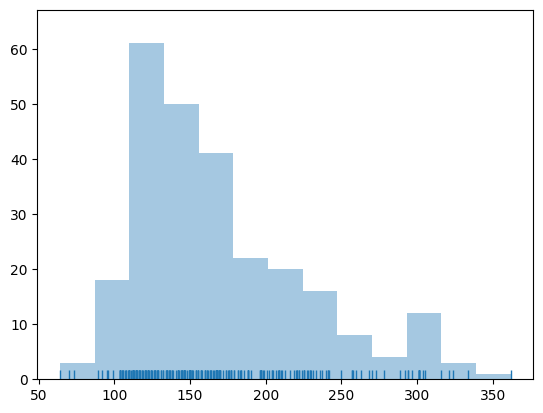

In [94]:
# In order to set the length of the document series (maxlen), we visualise the distribution of the number of words per documents.
sizes = []
out = display(progress(0, len(X_train)), display_id=True)
for ii, txt in enumerate(X_train):
    sizes.append(len(word_tokenize(txt)))
    out.update(progress(ii, len(X_train)))

sns.distplot(sizes, kde=False, rug=True)

In [98]:
num_words = 2500 # Size of the vocabulary used. we only consider the 2500 most common words. The other words are removed from the texts.
maxlen = 160 # Number of word considered for each document. we cut or lengthen the texts to have texts of 150 words.
word_dimension = 50 # dimension of our word vectors.

In [99]:
# The Tokenizer provided by the Keras library allows to perform such transformation.
keras_tokenizer = Tokenizer(num_words=num_words)
keras_tokenizer.fit_on_texts(X_train)
# word_index is the dictionary that contains the index of each words in our 2500 long vocabulary.
word_index = keras_tokenizer.word_index
sequences_train = keras_tokenizer.texts_to_sequences(X_train)
sequences_val = keras_tokenizer.texts_to_sequences(X_val)
sequences_test=keras_tokenizer.texts_to_sequences(X_test)

In [100]:
print('Text : '+X_train[0])
print('Index sequences : ' +str(sequences_train[0]))

Text : equity-income balanced funds generally strive income growth stocks and/or bond investments bond funds seek current income bond investments securities rated bb+ ba1 sometimes referred junk bonds. exposure lower rated securities may help fund achieve objective providing current income falling interest rates may cause issuer redeem call refinance debt security stated maturity may result fund reinvest proceeds lower yielding securities issuers securities may susceptible actions foreign governments imposition price controls punitive taxes could adversely impact value securities selection underlying funds allocation fund assets could cause fund lose value results lag relevant benchmarks funds similar objectives
Index sequences : [50, 29, 457, 16, 162, 687, 29, 84, 111, 39, 40, 49, 34, 49, 16, 458, 213, 29, 49, 34, 9, 261, 607, 608, 527, 484, 567, 185, 87, 68, 261, 9, 3, 328, 1, 322, 251, 568, 213, 29, 323, 46, 57, 3, 95, 206, 90, 304, 387, 171, 54, 252, 313, 3, 88, 1, 342, 207, 68, 32

In [101]:
len(sequences_train)

259

In [102]:
#Then we use the pad_sequence function provided by keras to truncate or lengthen (by adding zeros)
#each text so they all have the same length : 170
feature_train = pad_sequences(sequences_train, maxlen=maxlen, dtype=float, padding='post', truncating='post')
feature_val = pad_sequences(sequences_val, maxlen=maxlen, dtype=float, padding='post', truncating='post')
feature_test=pad_sequences(sequences_test, maxlen=maxlen, dtype=float, padding='post', truncating='post')

In [103]:
print(len(X_train[0]))
len(feature_train[0])

714


160

In [104]:
word2vec.get("stock")

array([-0.52702427,  0.546883  , -0.5217987 , -0.43095547, -0.5527872 ,
        0.4939101 ,  0.456268  , -0.50855875, -0.5313279 , -0.48267663,
       -0.49233153,  0.47901547,  0.48313826, -0.4651238 , -0.46131042,
       -0.4708229 ,  0.498532  ,  0.4933306 , -0.5404466 ,  0.47832614,
       -0.45568234,  0.46188068,  0.44874865, -0.46084365, -0.43395746,
        0.5326104 ,  0.45170507, -0.49335197,  0.5231367 ,  0.43798825,
        0.4742455 , -0.47718424, -0.4704817 , -0.50724834, -0.43765053,
       -0.4610433 ,  0.49027053, -0.49304688, -0.4748721 , -0.4476859 ,
        0.49050564,  0.49190056,  0.51036674, -0.4561873 ,  0.4454228 ,
        0.5108056 , -0.47885454, -0.5172404 , -0.44386956,  0.48884946],
      dtype=float32)

In [105]:
word_index.get("investments")

34

In [106]:
X_train[0]

'equity-income balanced funds generally strive income growth stocks and/or bond investments bond funds seek current income bond investments securities rated bb+ ba1 sometimes referred junk bonds. exposure lower rated securities may help fund achieve objective providing current income falling interest rates may cause issuer redeem call refinance debt security stated maturity may result fund reinvest proceeds lower yielding securities issuers securities may susceptible actions foreign governments imposition price controls punitive taxes could adversely impact value securities selection underlying funds allocation fund assets could cause fund lose value results lag relevant benchmarks funds similar objectives'

In [107]:
print ('length of the first sequence : '+str(len(sequences_train[0])) )
print ('length of the paded first sequence : '+str(len(feature_train[0])) )

length of the first sequence : 96
length of the paded first sequence : 160


In [108]:
#matrix representation of the words in our vocabulary
# word_index is the dictionary that contains the index of each words in our 2500 long vocabulary.
embedding_matrix = np.zeros((len(word_index) + 1, word_dimension))
for word, i in word_index.items():
    embedding_vector = word2vec.get(word)

    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [109]:
embedding_matrix[1]

array([-0.51161611,  0.49861488, -0.45986888, -0.51044023, -0.4733614 ,
        0.48179847,  0.48942891, -0.52708107, -0.47881442, -0.44727966,
       -0.45656052,  0.4437072 ,  0.45148158, -0.47779301, -0.51318449,
       -0.47875041,  0.52369714,  0.45715469, -0.49631903,  0.52710831,
       -0.48395544,  0.5100708 ,  0.50592208, -0.46686277, -0.50518817,
        0.509     ,  0.43394583, -0.44495079,  0.45079893,  0.49803144,
        0.51884866, -0.4787567 , -0.46801475, -0.52083337, -0.500175  ,
       -0.53125322,  0.42735058, -0.47766268, -0.46364808, -0.49993426,
        0.46382937,  0.51606905,  0.50196582, -0.50648367,  0.51581132,
        0.44917157, -0.4634071 , -0.51167554, -0.50772369,  0.48334512])

In [110]:
embedding_matrix.shape

(2201, 50)

In [111]:
len(word_index) + 1

2201

In [112]:
word_dimension

50

## First model: One dimensional Convolutional Neural Network

def create_CNN_model():
    CNN = Sequential()
    # The Embedding layer takes the embedding matrix as an argument and transform the inputed the sequences of index to sequences of vectors.
    CNN.add(Embedding(len(word_index) + 1, word_dimension, weights=[embedding_matrix], input_length=maxlen, trainable=False))

    CNN.add(Convolution1D(64, 5, activation = 'relu'))
    CNN.add(MaxPooling1D(pool_size = 5))

    CNN.add(Convolution1D(32, 5, activation = 'relu'))
    CNN.add(MaxPooling1D(pool_size = 5))

    CNN.add(Flatten())
    CNN.add(Dense(units = 128 , activation = 'relu'))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(units = 1, activation = 'sigmoid'))

    CNN.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

    return CNN

In [113]:
def create_CNN_model():
    CNN = Sequential()
    CNN.add(Embedding(len(word_index) + 1, word_dimension, weights=[embedding_matrix], input_length=maxlen, trainable=False))

    CNN.add(Convolution1D(64, 5, activation='relu'))
    CNN.add(MaxPooling1D(pool_size=5))

    CNN.add(Convolution1D(32, 5, activation='relu'))
    CNN.add(MaxPooling1D(pool_size=5))

    CNN.add(Flatten())
    CNN.add(Dense(units=128, activation='relu'))
    CNN.add(Dropout(0.5))
    CNN.add(Dense(units=3, activation='softmax'))

    CNN.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

    return CNN

In [114]:
CNN_model = create_CNN_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [115]:
CNN_history = CNN_model.fit(feature_train, y_train, epochs=10, batch_size=16, validation_data=(feature_val, y_val))

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 186ms/step - accuracy: 0.3441 - loss: 1.1595 - val_accuracy: 0.5116 - val_loss: 1.0263
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5270 - loss: 1.0312 - val_accuracy: 0.5116 - val_loss: 1.0077
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5621 - loss: 1.0123 - val_accuracy: 0.5116 - val_loss: 1.0044
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4950 - loss: 1.0236 - val_accuracy: 0.5116 - val_loss: 0.9857
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5005 - loss: 1.0128 - val_accuracy: 0.5349 - val_loss: 0.9608
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5617 - loss: 0.9642 - val_accuracy: 0.5349 - val_loss: 0.9397
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.4768 - loss: 1.0205 - val_accuracy: 0.5465 - val_loss: 0.9208
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6107 - loss: 0.8983 - val_accuracy: 0.5814 - val_los

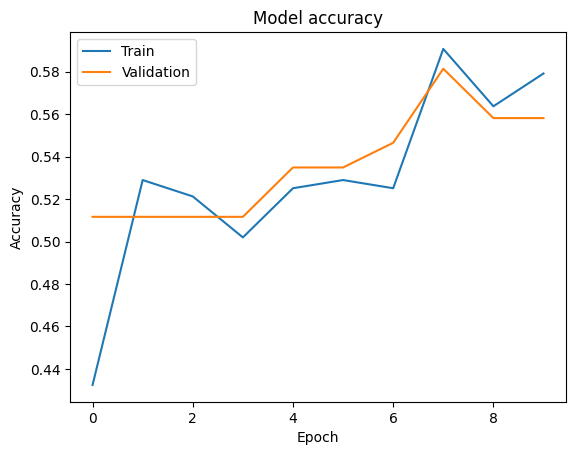

In [116]:
# Plot training & validation accuracy
plt.plot(CNN_history.history['accuracy'])
plt.plot(CNN_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

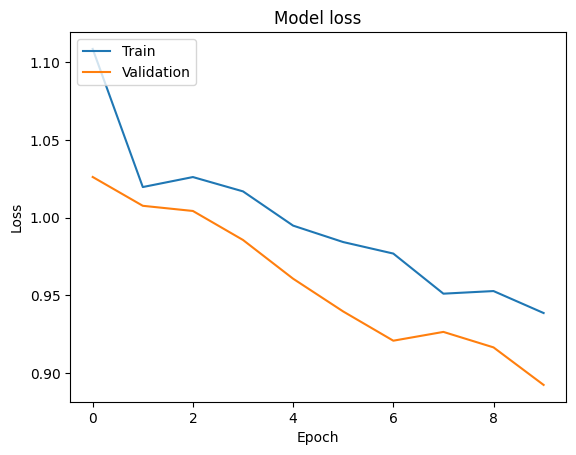

In [117]:
# Plot training & validation loss values
plt.plot(CNN_history.history['loss'])
plt.plot(CNN_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [118]:
y_pred_CNN = CNN_model.predict(feature_val)

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 203ms/step


In [119]:
y_pred_label = np.argmax(y_pred_CNN, axis=1)

In [120]:
report=classification_report(y_val,y_pred_label)
print(report)

              precision    recall  f1-score   support

         0.0       0.55      0.95      0.69        44
         1.0       0.00      0.00      0.00        23
         2.0       0.67      0.32      0.43        19

    accuracy                           0.56        86
   macro avg       0.40      0.42      0.37        86
weighted avg       0.43      0.56      0.45        86



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Second Model

In [121]:
def create_RNN_model():
    RNN = Sequential()
    RNN.add(Embedding(len(word_index) + 1, word_dimension, weights=[embedding_matrix], input_length = maxlen, trainable=False))

    RNN.add(Bidirectional(LSTM(word_dimension)))
    RNN.add(Dense(word_dimension, activation='relu'))
    RNN.add(Dense(1, activation='sigmoid'))
    RNN.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

    return RNN

In [122]:
RNN_model = create_RNN_model()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [123]:
RNN_history = RNN_model.fit(feature_train, y_train, epochs=10, batch_size=16, validation_data=(feature_val, y_val))

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - accuracy: 0.2814 - loss: 0.6618 - val_accuracy: 0.2674 - val_loss: 0.5685
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.2620 - loss: 0.6315 - val_accuracy: 0.2674 - val_loss: 0.5798
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.2785 - loss: 0.6273 - val_accuracy: 0.2674 - val_loss: 0.5816
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2715 - loss: 0.6117 - val_accuracy: 0.2674 - val_loss: 0.5654
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.2859 - loss: 0.6053 - val_accuracy: 0.2674 - val_loss: 0.5819
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - accuracy: 0.2736 - loss: 0.5916 - val_accuracy: 0.2674 - val_loss: 0.5642
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.2882 - loss: 0.5757 - val_accuracy: 0.2674 - val_loss: 0.5690
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.2676 - loss: 0.6535 - val_accuracy: 0.2674 - v

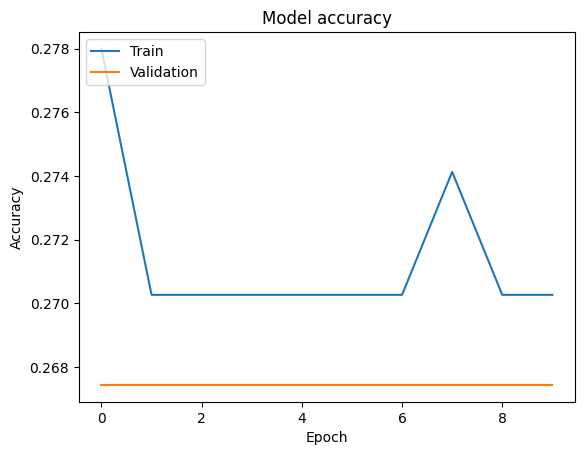

In [124]:
# Plot training & validation accuracy values
plt.plot(RNN_history.history['accuracy'])
plt.plot(RNN_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

## New word2vec

In [ ]:
word2vec_new=load_word2vec("/content/gdrive/MyDrive/Colab Notebooks/MF815/NLP/NLP_app/word2vec_perso.txt")

In [ ]:
#matrix representation of the words in our vocabulary
# word_index is the dictionary that contains the index of each words in our 2500 long vocabulary.
embedding_matrix_new = np.zeros((len(word_index) + 1, word_dimension))
for word, i in word_index.items():
    embedding_vector = word2vec_new.get(word)

    if embedding_vector is not None:
        embedding_matrix_new[i] = embedding_vector

## Transform document txt to vector

In [125]:
def document_vector_mean(feature_data, embedding_matrix):
    doc_vectors = []
    for doc in feature_data:
        word_vecs = []
        for idx in doc:
            if idx != 0:
                word_vec = embedding_matrix[idx]
                word_vecs.append(word_vec)
        if word_vecs:
            doc_vector = np.mean(word_vecs, axis=0)
        else:
            doc_vector = np.zeros(embedding_matrix.shape[1])
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

In [126]:
def document_vector_norm_weighted(feature_data, embedding_matrix):
    doc_vectors = []
    for doc in feature_data:
        word_vecs = [embedding_matrix[idx] for idx in doc if idx != 0]
        if word_vecs:
            word_arr = np.array(word_vecs)
            norms = np.linalg.norm(word_arr, axis=1)
            sum_norms = norms.sum()
            if sum_norms == 0:
                doc_vector = np.mean(word_arr, axis=0)  # Fallback to mean
            else:
                weights = norms / sum_norms
                doc_vector = np.dot(weights, word_arr)
        else:
            doc_vector = np.zeros(embedding_matrix.shape[1])
        doc_vectors.append(doc_vector)
    return np.array(doc_vectors)

In [127]:
feature_train_int = feature_train.astype(int)
feature_val_int=feature_val.astype(int)
feature_test_int=feature_test.astype(int)
X_train_vec=document_vector_mean(feature_train_int, embedding_matrix)
X_val_vec=document_vector_mean(feature_val_int, embedding_matrix)
X_test_vec=document_vector_mean(feature_test_int, embedding_matrix)

In [128]:
X_train_vec=document_vector_norm_weighted(feature_train_int, embedding_matrix)
X_val_vec=document_vector_norm_weighted(feature_val_int, embedding_matrix)
X_test_vec=document_vector_norm_weighted(feature_test_int, embedding_matrix)

In [ ]:
X_train_vec=document_vector_norm_weighted(feature_train_int, embedding_matrix_new)
X_val_vec=document_vector_norm_weighted(feature_val_int, embedding_matrix_new)
X_test_vec=document_vector_norm_weighted(feature_test_int, embedding_matrix_new)

In [129]:
X_train_vec

array([[-0.4801011 ,  0.49525288, -0.52563552, ..., -0.4736114 ,
        -0.48246902,  0.47728673],
       [-0.47958325,  0.49537869, -0.52638409, ..., -0.47432019,
        -0.48359371,  0.47665846],
       [-0.47958325,  0.49537869, -0.52638409, ..., -0.47432019,
        -0.48359371,  0.47665846],
       ...,
       [-0.48141966,  0.4890497 , -0.52176607, ..., -0.46657929,
        -0.48199077,  0.47881029],
       [-0.47767958,  0.48654023, -0.52420494, ..., -0.46318924,
        -0.4765423 ,  0.47752866],
       [-0.47847556,  0.4909724 , -0.5185461 , ..., -0.47229304,
        -0.48389164,  0.47661523]])

## SVM

In [130]:
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from scipy.stats import uniform, reciprocal

In [131]:
from sklearn.svm import SVC
liner_svm=SVC(kernel="linear",C=0.1,probability=True)
liner_svm.fit(X_train_vec,y_train)

SVC(C=0.1, kernel='linear', probability=True)

In [132]:
svc_val_pred=liner_svm.predict(X_val_vec)

In [133]:
print("\nClassification Report:test set")
print(classification_report(y_val, svc_val_pred))


Classification Report:test set
              precision    recall  f1-score   support

         0.0       0.51      1.00      0.68        44
         1.0       0.00      0.00      0.00        23
         2.0       0.00      0.00      0.00        19

    accuracy                           0.51        86
   macro avg       0.17      0.33      0.23        86
weighted avg       0.26      0.51      0.35        86



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [134]:
param_distributions = {
    'C': reciprocal(0.1, 100),
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1],
    'degree': [2, 3, 4],
    'class_weight': [None, 'balanced'],
    'shrinking': [True, False]
}

svm = SVC()
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

random_search = RandomizedSearchCV(
    svm, param_distributions=param_distributions,
    n_iter=50, cv=cv, scoring='accuracy', verbose=2, n_jobs=-1, random_state=42
)
random_search.fit(X_train_vec, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
                   estimator=SVC(), n_iter=50, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7a92cfec2450>,
                                        'class_weight': [None, 'balanced'],
                                        'degree': [2, 3, 4],
                                        'gamma': ['scale', 'auto', 0.001, 0.01,
                                                  0.1, 1],
                                        'kernel': ['linear', 'rbf', 'poly'],
                                        'shrinking': [True, False]},
                   random_state=42, scoring='accuracy', verbose=2)

In [135]:
X_trainval_features = np.vstack([X_train_vec, X_val_vec])
y_trainval = np.hstack([y_train, y_val])

final_svm = SVC(**random_search.best_params_)
final_svm.fit(X_trainval_features, y_trainval)

SVC(C=np.float64(65.84106160121607), class_weight='balanced', gamma=1,
    kernel='poly', shrinking=False)

In [136]:
y_test_pred = final_svm.predict(X_test_vec)
y_test_pred

array([0., 0., 0., 1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 2., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 2., 2., 2., 0.,
       0., 0., 0., 1., 1., 2., 2., 1., 1., 1., 0., 0., 0., 0., 0., 2., 0.,
       0., 2.])

In [137]:
report = classification_report(y_test, y_test_pred)
print(report)

              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74        37
         1.0       0.73      0.79      0.76        28
         2.0       0.71      0.68      0.70        22

    accuracy                           0.74        87
   macro avg       0.73      0.73      0.73        87
weighted avg       0.74      0.74      0.74        87

